# LKJ Prior
Please find numpyro implementation of this notebook here:https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/book2/03/lkj.ipynb

In [1]:
%%capture
# We illustrate LKJ prior as discussed in fig 14.3 of
# [Statistical Rethinking ed 2](https://xcelab.net/rm/statistical-rethinking/).

try:
    from probml_utils import latexify, is_latexify_enabled, savefig
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import latexify, is_latexify_enabled, savefig
try:
    import tensorflow
except:
    %pip install tensorflow  #Not needed explicitly for the code but internally for working of tfp
try:
    import tensorflow_probability as tfp
except:
    %pip install tensorflow_probability
    import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import seaborn as sns

In [2]:
latexify(width_scale_factor=3, fig_height=1.5)

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


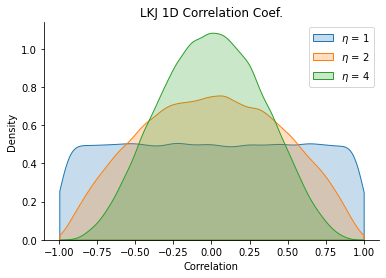

In [5]:
def plot(eta_list, savename, random_seed):
    font_size = 6 if is_latexify_enabled() else None
    rng_key = jax.random.PRNGKey(random_seed)
    rng_key, rng_key_ = jax.random.split(rng_key)
    fig, ax = plt.subplots()
    for i, eta in enumerate(eta_list):
        dist = tfp.distributions.LKJ(dimension=2, concentration=eta)
        ans = dist.sample(sample_shape=[100000], seed=8)
        sns.kdeplot(ans[:, 0, 1], label=f"$\eta$ = {eta}", clip=[-1, 1], shade=True)
    plt.legend(loc="upper right", fontsize=font_size)
    ax.set_xlabel("Correlation")
    ax.set_ylabel("Density")
    # ax.set_ylim(0, 1.2)
    # ax.set_xlim(-1.2, 1.2)
    plt.title("LKJ 1D Correlation Coef.")
    sns.despine()
    if len(savename) > 0:
        savefig(savename)
    plt.show()


plot([1, 2, 4], "LKJ_1d_correlation", 0)

In [4]:
from ipywidgets import interact


@interact(eta=(1, 4), random_seed=(1, 20))
def generate_random(eta=2, random_seed=10):
    plot([eta], "", random_seed)

interactive(children=(IntSlider(value=2, description='eta', max=4, min=1), IntSlider(value=10, description='ra…